# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday February 27th, 2023 at 23:55. Hand in your files via [http://peergrade.io](http://peergrade.io/).

**Peergrading date and time**: _Remember that after handing in you have 1 week to evaluate a few assignments written by other members of the class_. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calplot
from urllib.request import urlopen
import json
import plotly.express as px

In [2]:
df = pd.read_csv('Data/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
df['Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%m/%d/%Y %H:%M')
df = df.drop(df[df['Timestamp'] >= '2018-01-01'].index)

## A1 Part 1: Visualizing patterns in the data

In this sub-assignment, we recreate some of the plots from Week 2. We look only at the focus-crimes.

In [3]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

For each set of plots below, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (we provided a couple of ideas during class but it's OK to add more).

* First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).
* Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.
* Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.

> **Week-day plots**
>
> We start by creating the week-day plots by simply counting the total number of occurrences of the specific focus crime on each day of the week.

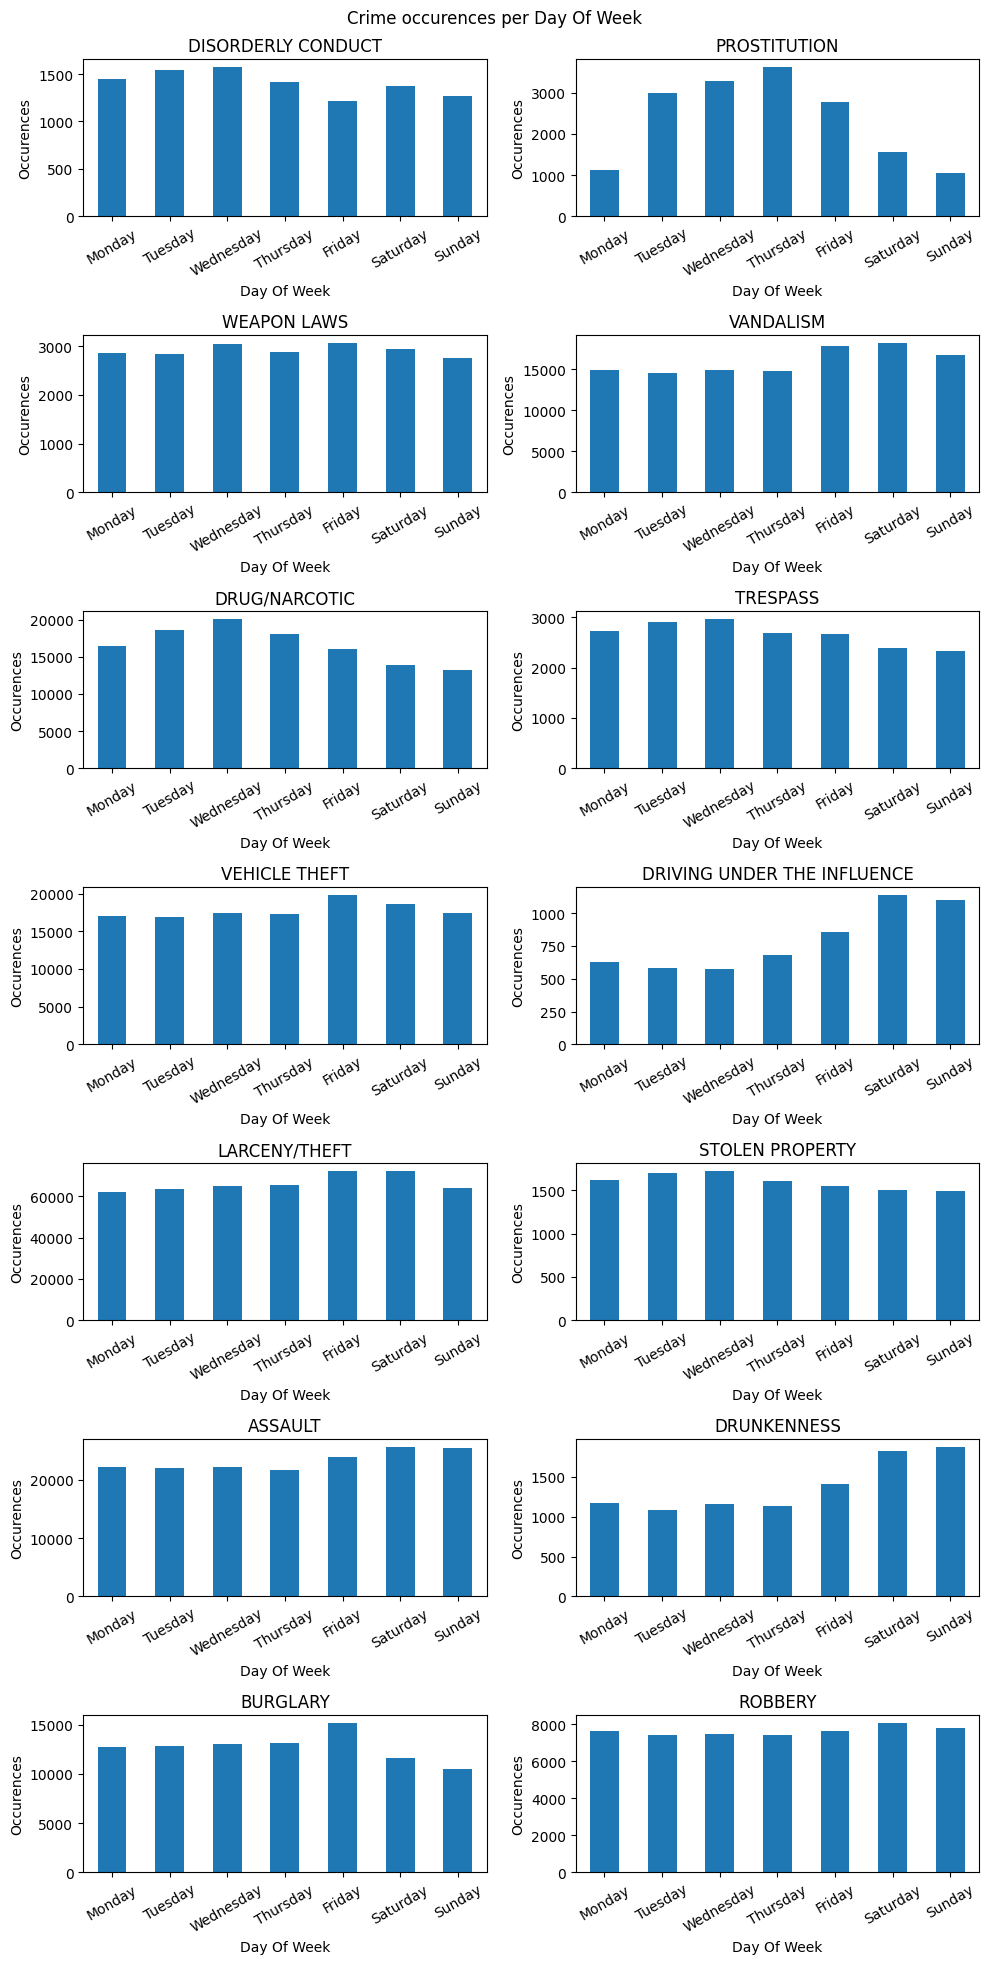

In [4]:
fig = plt.figure(figsize=(10,20))
for i, crime in enumerate(focuscrimes):
    df_i = df.loc[df.Category == crime]
    crimes_per_DayOfWeek = df_i.groupby([df_i['Timestamp'].dt.day_of_week,df_i['Timestamp'].dt.day_name()])['DayOfWeek'].value_counts()
    crimes_per_DayOfWeek = crimes_per_DayOfWeek.droplevel(0,'index').droplevel(0,'index')
    ax = fig.add_subplot(7, 2, i + 1)
    crimes_per_DayOfWeek.plot(ax=ax, kind='bar', title=crime, xlabel="Day Of Week", ylabel="Occurences")
    ax.tick_params(axis='x', labelrotation = 30)
fig.suptitle('Crime occurences per Day Of Week')
fig.tight_layout(rect=[0, 0, 1, 0.99])

> In this plot we observe that all of the focus crimes occur frequently as the number of occurrences is high for all crimes during the week. However, we can observe some crime-specific trends during the week. We observe that most DRUNKNESS crimes take place during the weekend, which makes sense since most people tend to drink more during the weekends. Other crimes that could easily be associated with drunkness such as DRIVING UNDER INFLUENCE, VANDALISM, and ASSULT also have peaks during the weekends. More surprisingly PROSTITUTION and DRUG/NARCOTIC crimes peak in the middle of the week. 

> **Month plots**
>
> Next we create the month plots by counting the total number of occurrences of the specific focus crime in each month of the year.

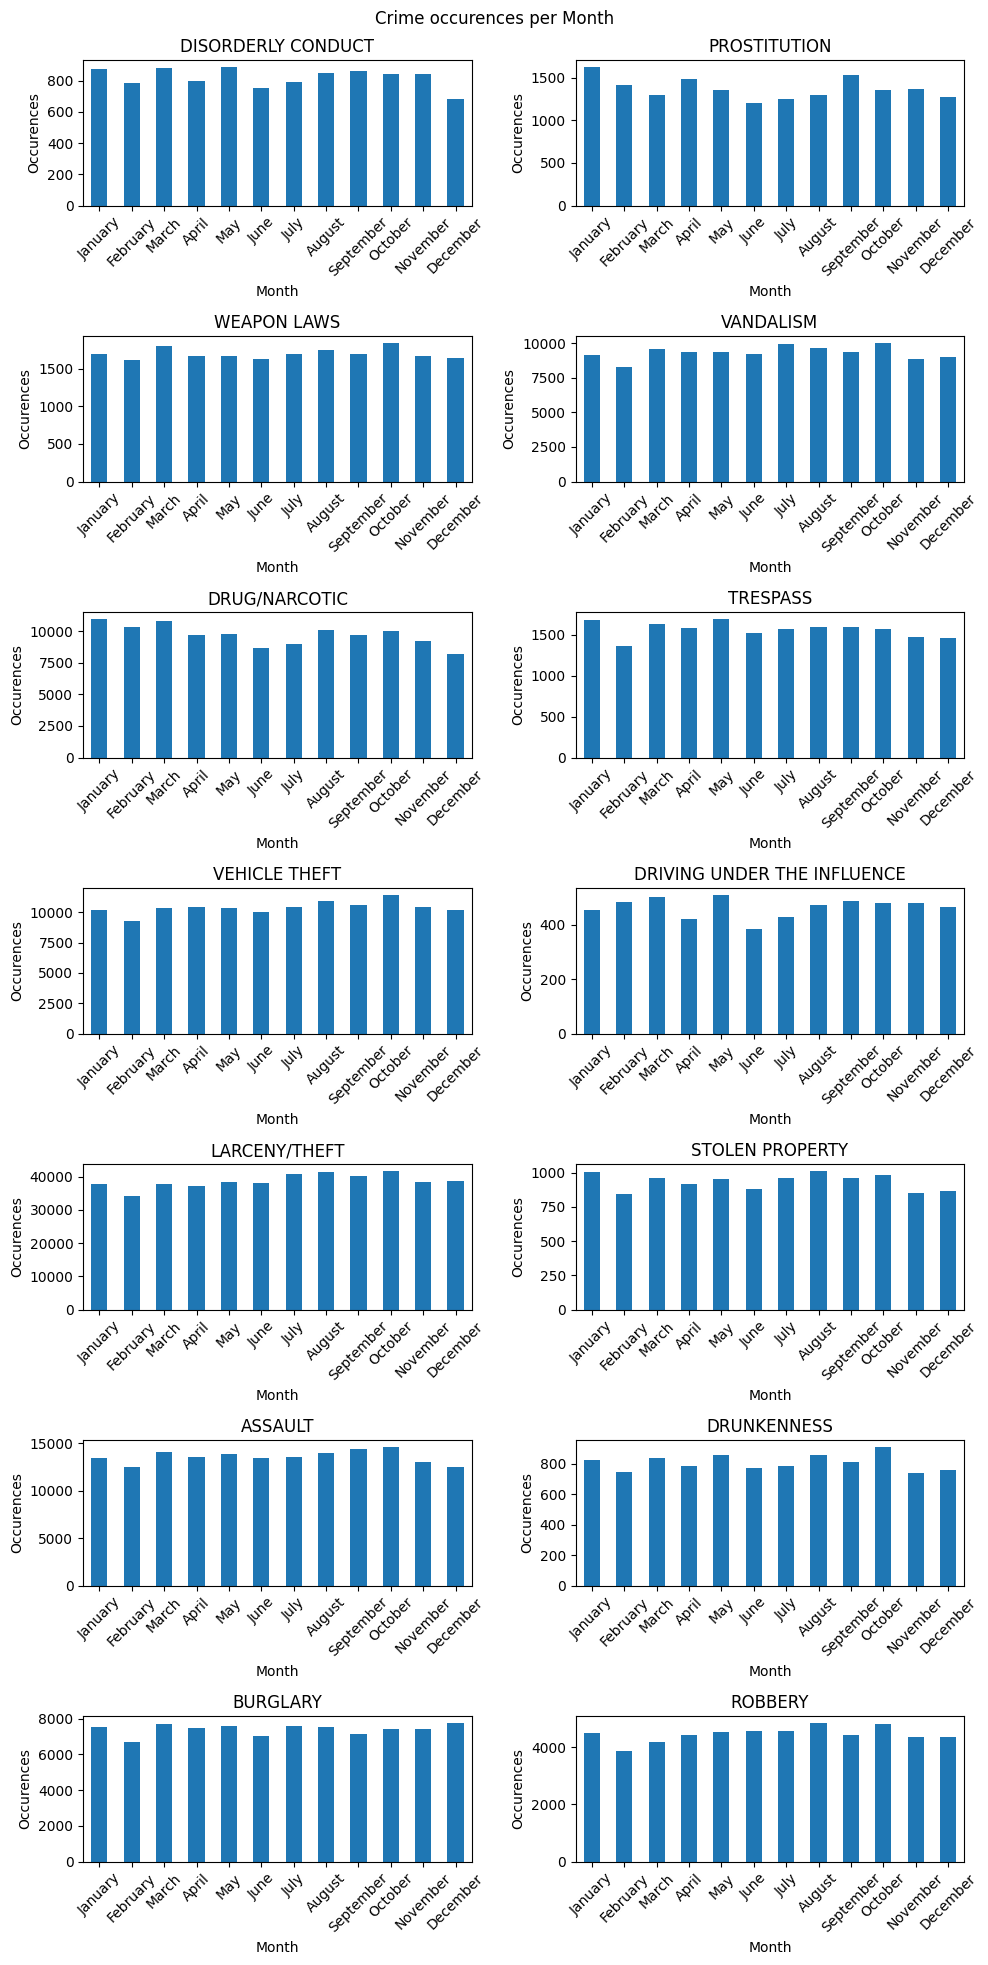

In [5]:
df['Month'] = df['Timestamp'].dt.month_name()
fig = plt.figure(figsize=(10,20))
for i, crime in enumerate(focuscrimes):
    df_i = df.loc[df.Category == crime]
    crimes_per_Month = df_i.groupby([df_i['Timestamp'].dt.month,df_i['Timestamp'].dt.month_name()])['Month'].value_counts()
    crimes_per_Month = crimes_per_Month.droplevel(0,'index').droplevel(0,'index')
    ax = fig.add_subplot(7, 2, i + 1)
    crimes_per_Month.plot(ax=ax, kind='bar', title=crime, xlabel="Month", ylabel="Occurences")
    ax.tick_params(axis='x', labelrotation = 45)
fig.suptitle('Crime occurences per Month')
fig.tight_layout(rect=[0, 0, 1, 0.99])

> In the figure above the number of incidents of all focus crimes is mostly evenly distributed throughout the 12 months. In the opposite to the previous plot, the occurrences of crimes on a monthly basis do not seem to differ significantly. 

> **24-hour cycle plots**
>
> Next we create the 24-hour cycle plots by counting the total number of occurrences of the specific focus crime in each hour of the day. 

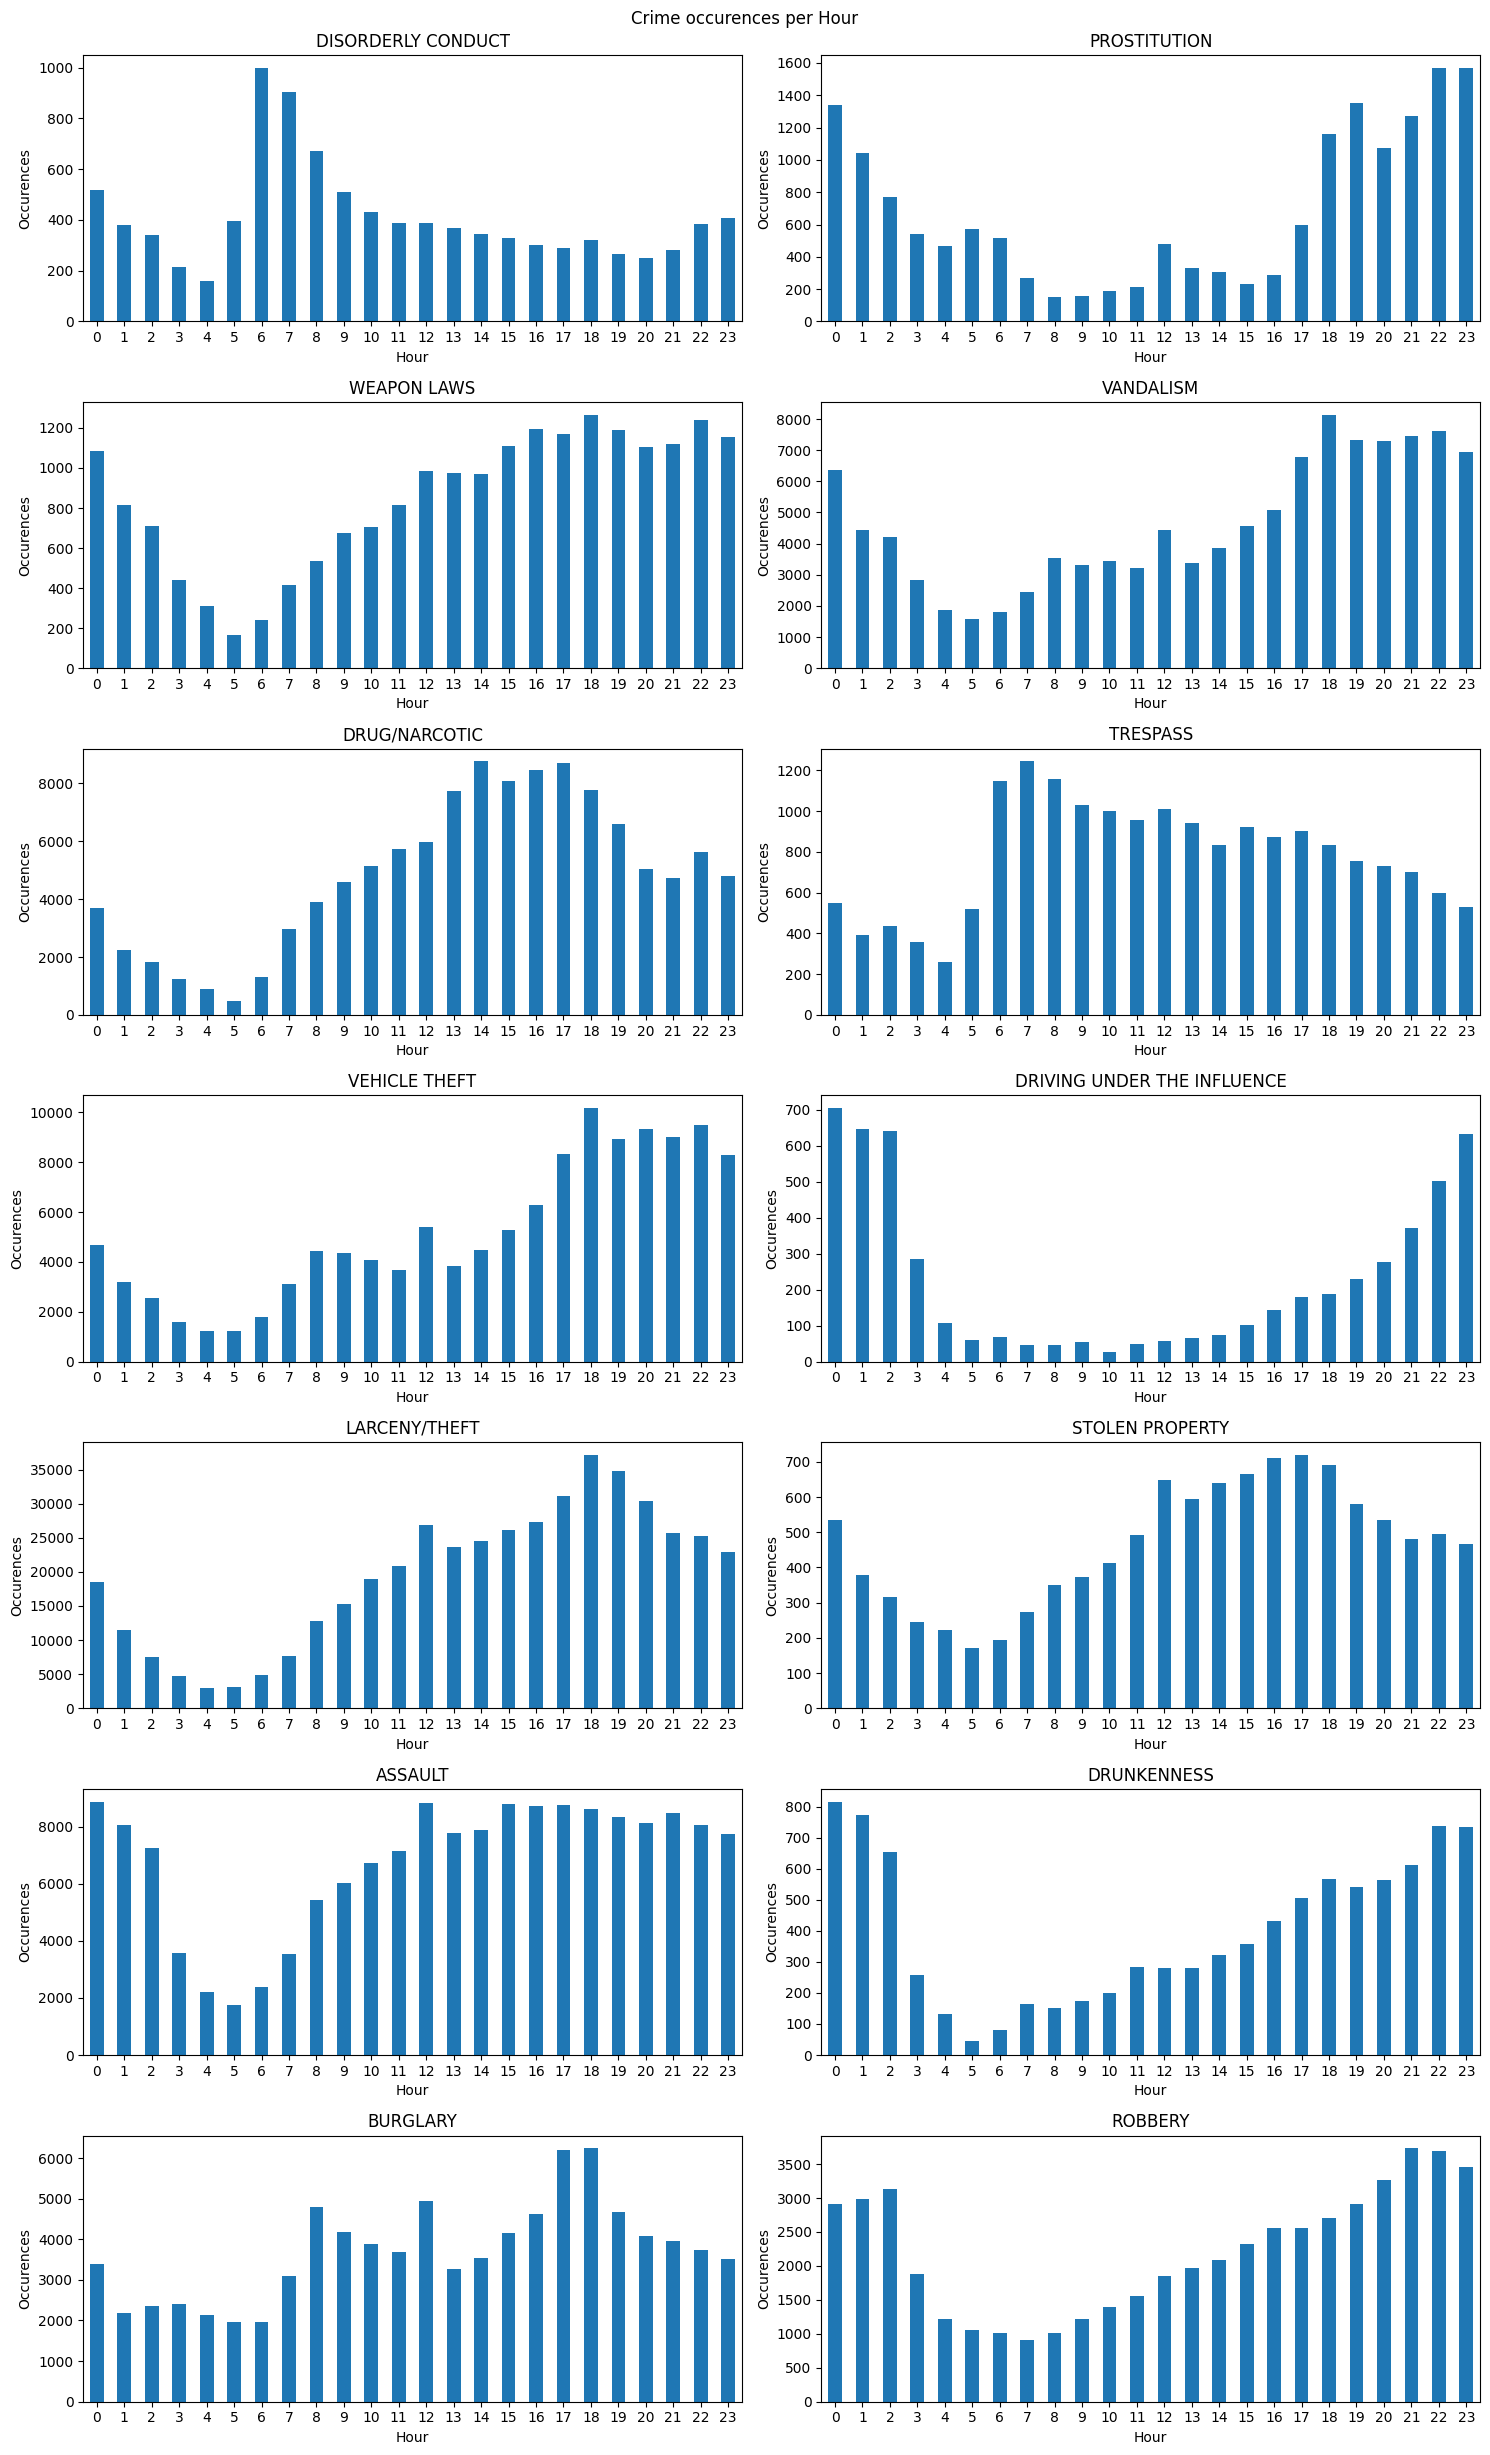

In [6]:
fig = plt.figure(figsize=(15,25))
for i, crime in enumerate(focuscrimes):
    df_i = df.loc[df.Category == crime]
    crimes_per_Hour = df_i['Timestamp'].dt.hour.value_counts().sort_index()
    ax = fig.add_subplot(7, 2, i + 1)
    crimes_per_Hour.plot(ax=ax, kind='bar', title=crime, xlabel="Hour", ylabel="Occurences")
    ax.tick_params(axis='x', labelrotation = 0)
fig.suptitle('Crime occurences per Hour')
fig.tight_layout(rect=[0, 0, 1, 0.99])

> In the plot above we can observe several trends for the occurrence of the focus crimes. We observe that for most of the focus crimes, the least crimes are committed around 4-5 am - typically when most people are asleep. After 5 am the crime occurrences increase throughout the day. This is very apparent for eg. DRUNKENNESS and WEAPON LAWS. Some crimes can be expected to happen at certain times. For example, DRUNKNESS and DRIVING UNDER THE INFLUENCE crimes are committed during the evening and night, which makes sense since people tend to drink more during the night. More surprisingly DISORDERLY CONDUCT peaks at 6 in the morning. This trend cannot be immediately explained by common knowledge, but one could guess that it is a result of people waking up and calling the police. 

> **168 hours of the week plots**
>
> Next we create the 168 hours of the week plots by counting the total number of occurrences of the specific focus crime in each hour of every day of the week.

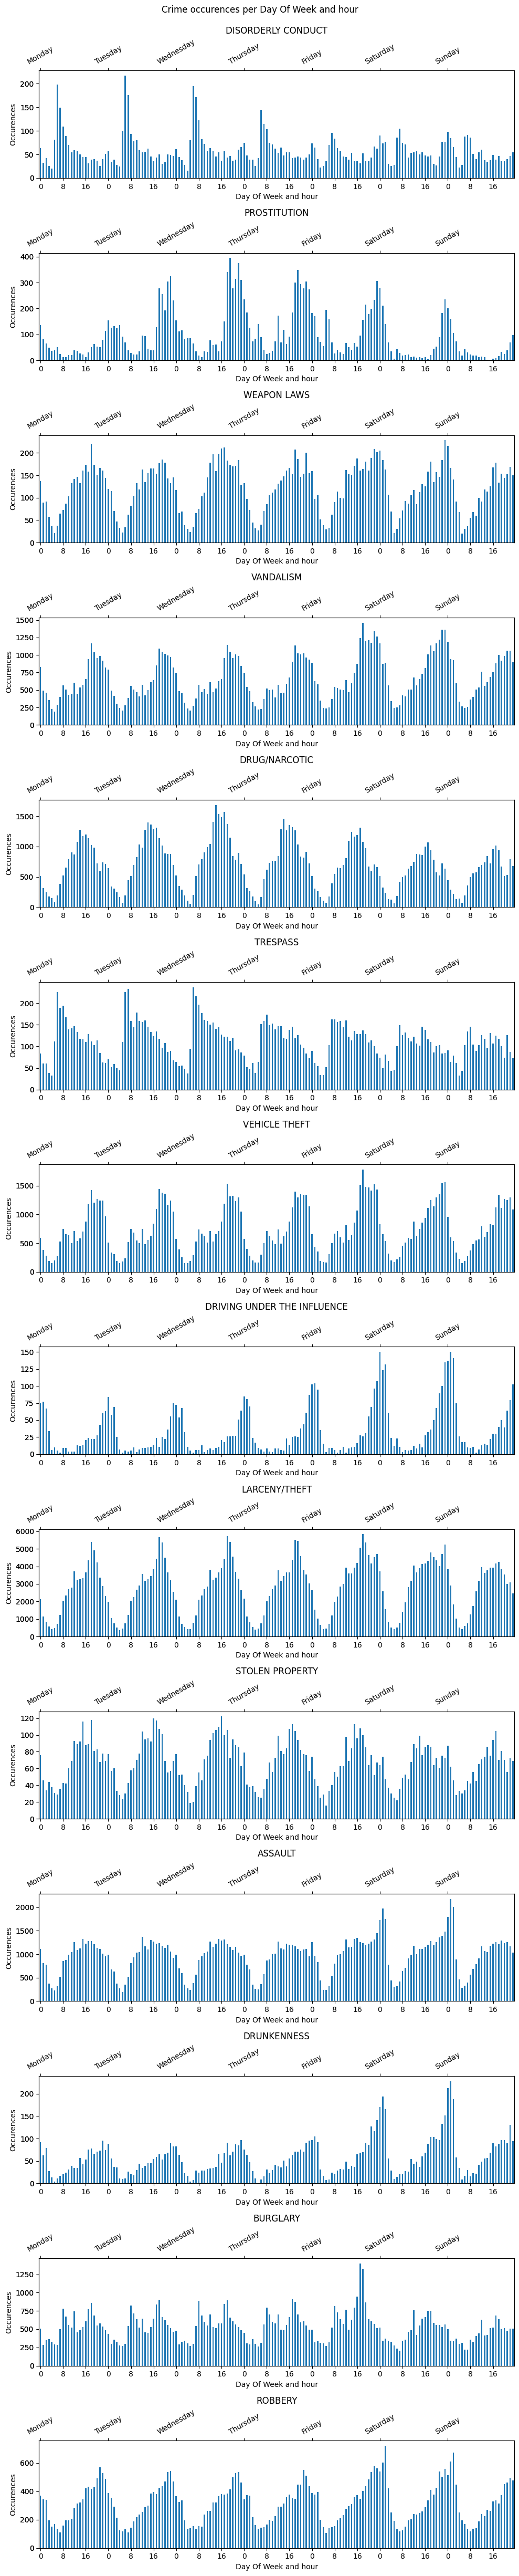

In [7]:
fig = plt.figure(figsize=(10,50))
for i, crime in enumerate(focuscrimes):
    df_i = df.loc[df.Category == crime]
    crimes_per_DayOfWeek_and_hour = df_i.groupby([df_i['Timestamp'].dt.day_of_week,df_i['Timestamp'].dt.day_name(),df_i['Timestamp'].dt.hour])['DayOfWeek'].value_counts()
    crimes_per_DayOfWeek_and_hour = crimes_per_DayOfWeek_and_hour.droplevel(0,'index').droplevel(0,'index')
    ax = fig.add_subplot(14, 1, i + 1)
    crimes_per_DayOfWeek_and_hour.droplevel(1,'index').plot(ax=ax, kind='bar', title=crime, xlabel="Day Of Week and hour", ylabel="Occurences")
    ax.locator_params(axis='x', nbins=7*3)
    ax.tick_params( axis='x', labelrotation = 0)
    ax2 = ax.twiny()
    crimes_per_DayOfWeek_and_hour.droplevel(0,'index').plot(ax=ax2, kind='bar', title='', xlabel='', ylabel='')
    ax2.locator_params(axis='x', nbins=7)
    ax2.tick_params( axis='x', labelrotation = 30)
fig.tight_layout(rect=[0, 0, 1, 0.975])
fig.suptitle('Crime occurences per Day Of Week and hour')
plt.show()

> Here we combine the week-day plot and the 24-hour cycle plot. This plot combines the two previous plots and provides a better overview of the trends during the week. As we have observed both a weekly and daily overview provides a lot of information about the focus crimes. Hence this plot connects these two into a single plot containing a lot of important information. For the specific focus crimes, we observe the same tendencies as previously - some crimes are more frequent on the weekends and happen during the afternoon and night.

> **Calendar plot**
>
> Next we create the calendar plot for ASSAULT.

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

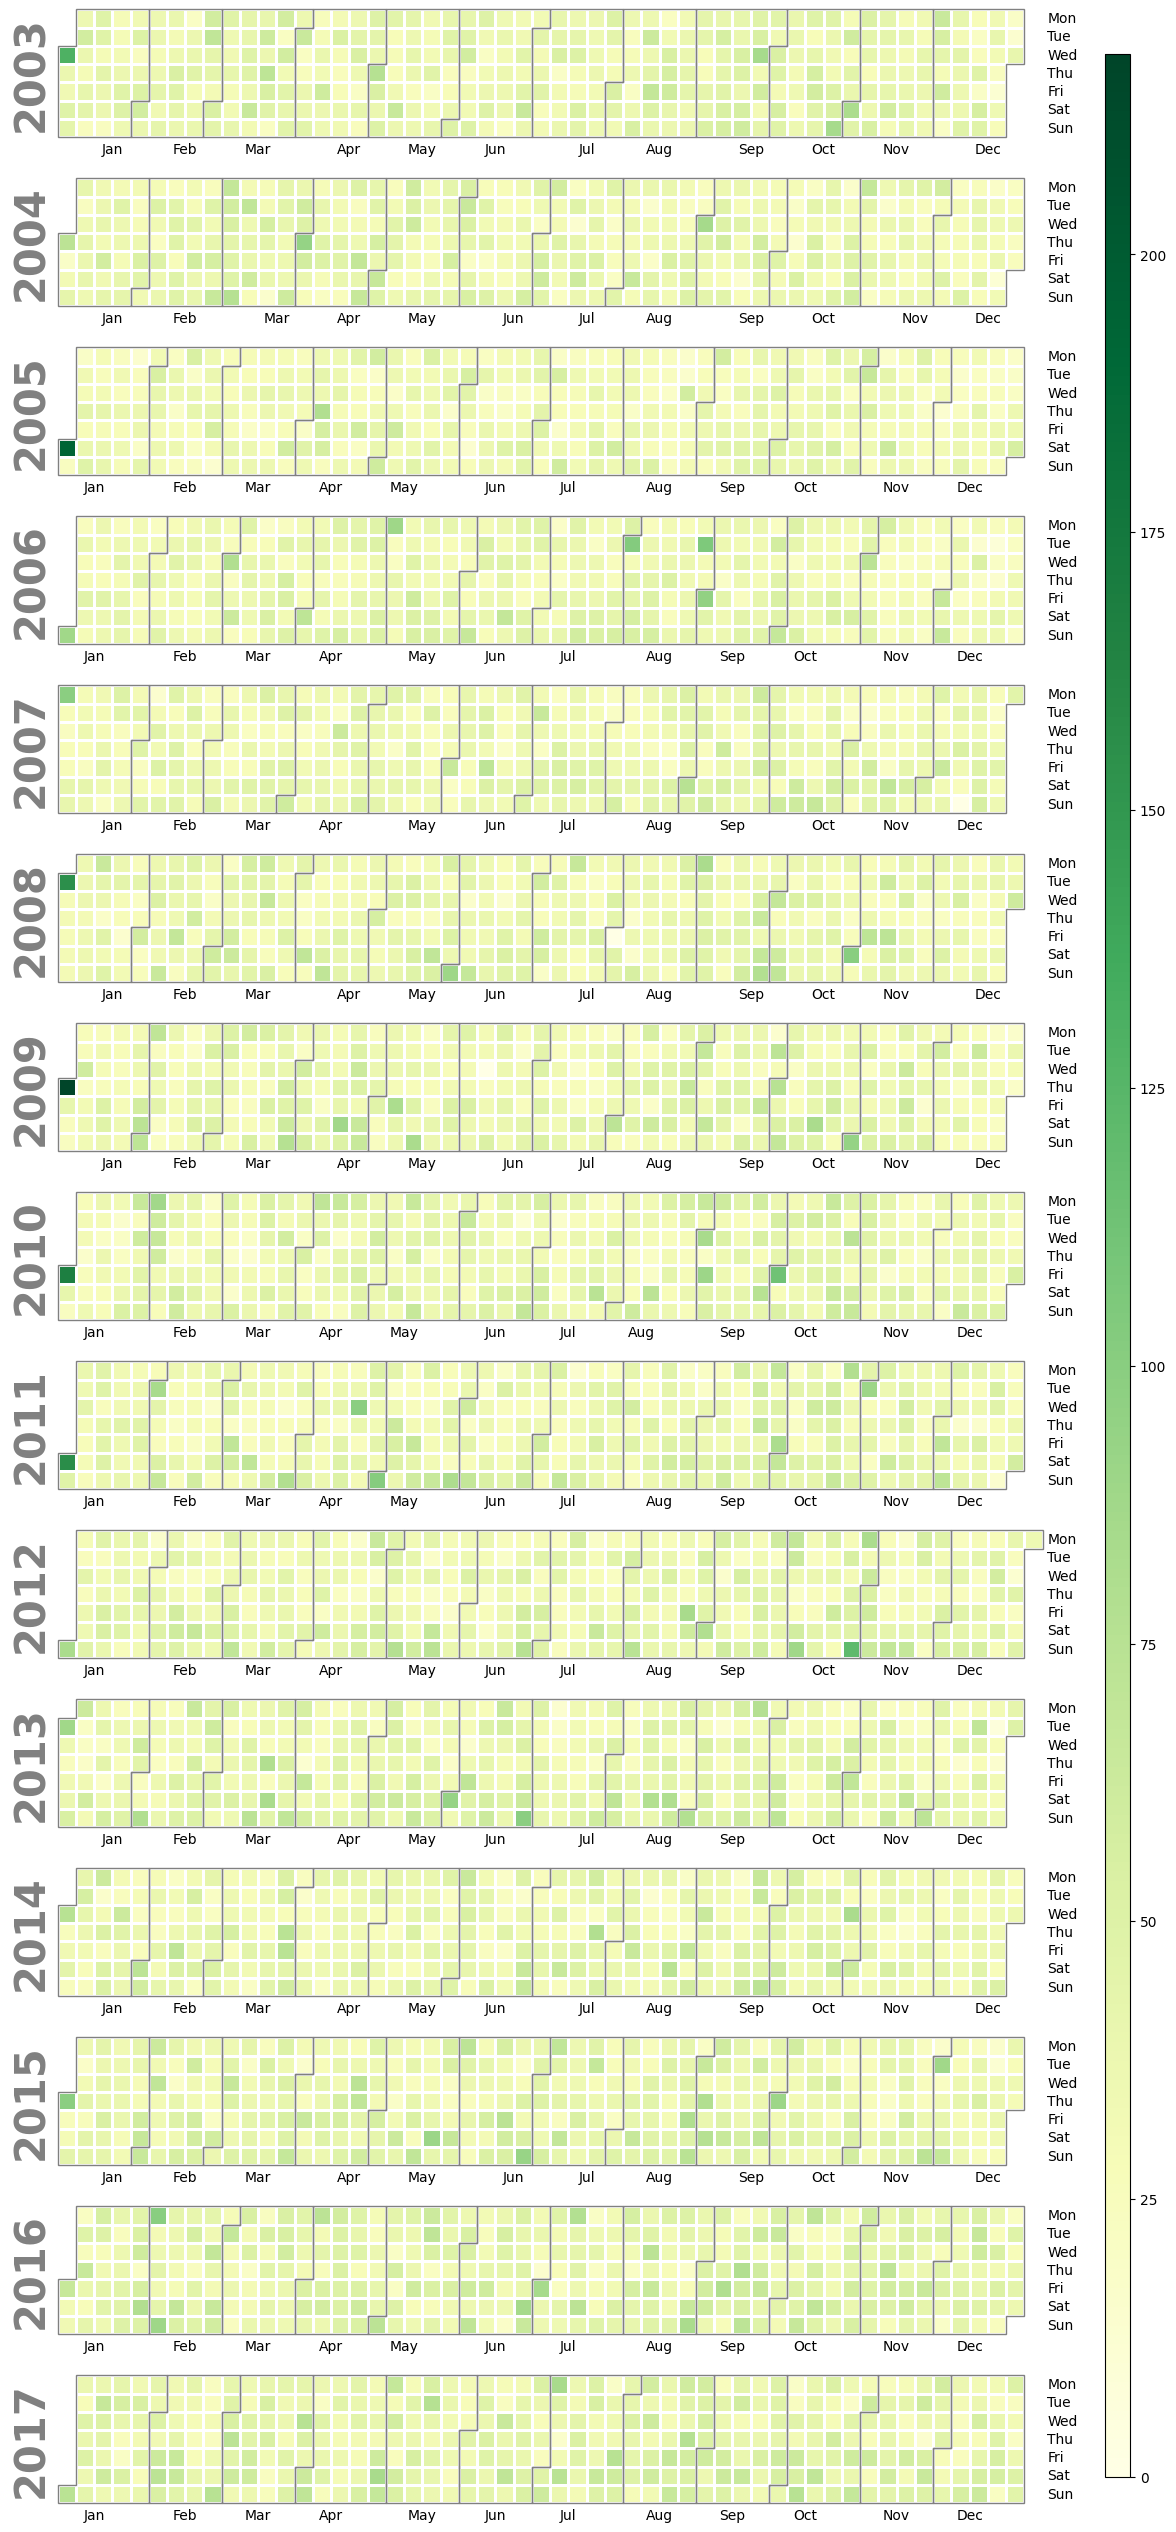

In [15]:
df_assult = df.loc[df.Category == 'ASSAULT']
events = pd.Series(df_assult['Timestamp'].value_counts(), index=df_assult['Timestamp'])
calplot.calplot(events, cmap='YlGn', colorbar=True)
plt.show()

> In the calendar plot we get an overview of when crimes happen during the year. The plot is very intuitive as the number of occurrences each day is shown similar to a heat map. Most days are very similar in terms of occurrences however in some years we see a large number of ASSULT crimes on the 1st of January.

> **Polar plot**
>
> Next we create a polar plot of the 24-hour cycle of DRUNKENNESS.

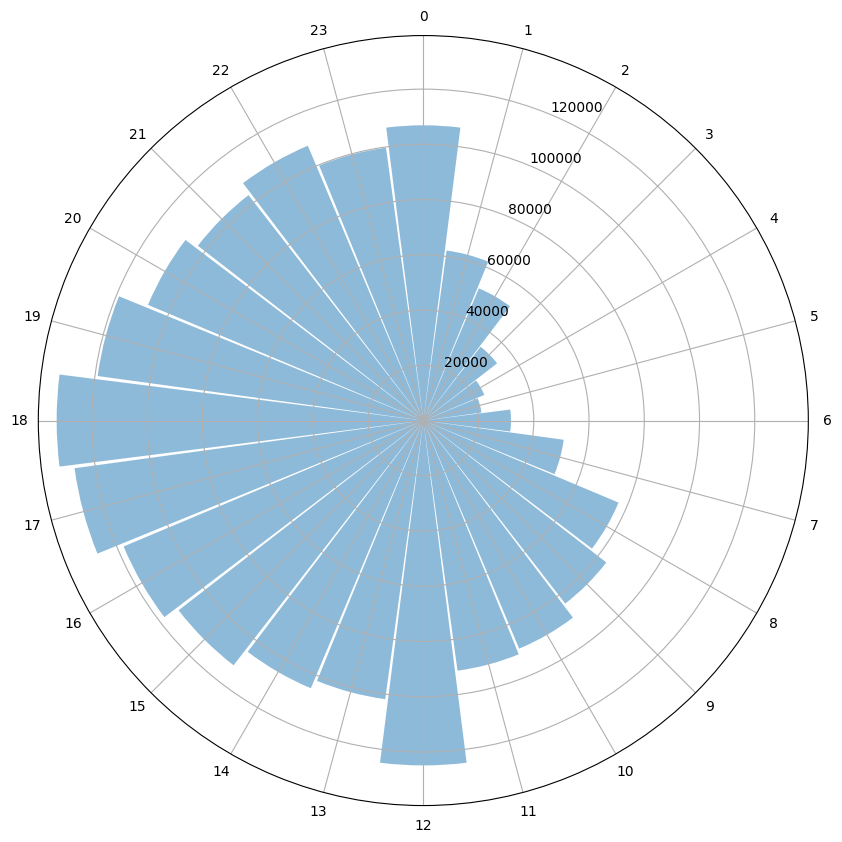

In [9]:
df_drunk = df.loc[df.Category == 'DRUNKENNESS']
events = df['Timestamp'].dt.hour.value_counts().sort_index()

# Compute pie slices
N = len(events)
radians = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
degrees = np.linspace(0.0, 360, N, endpoint=False)
times = events.index
width = 2*np.pi/ N-0.01


plt.figure(figsize=(10,10))
ax = plt.subplot(projection='polar')
ax.bar(radians, events, width=width, bottom=0.0, alpha=0.5)
ax.set_thetagrids(degrees, labels=times)
ax.set(theta_direction=-1,theta_zero_location='N')
plt.show()

> The polar above shows another way of visualizing occurrences during a 24-hour cycle.  Similar to the ordinary bar plots, this plot enhances how the occurrence of the crime is more frequent in the second half of the day.

## A1 Part 2: Dataviz questions 

Have a look at the encoding dataviz lecture (Week 4), then answer the following questions in your own words. 

* Mention 10 examples of ways we can encode data.
>
>   * Position
>   * Length
>   * Area
>   * Shape
>   * Color
>   * Angle
>   * Line weight
>   * Line ending
>   * Texture
>   * Pattern
>
* Are all encodings created equally? Why not? Can you think of an example from the previous lectures?
>
> No, some aspects are more important than others. If for example, you have a visualization with more than one set of data eg. as presented in week 2 where different bandwidths are used for density estimation, it is very important to have a clear distinction between sets. Here colors of the different density curves plays are large role in the interpretation of the visualization. Instead of different colors, different patterns could also have been chosen. However choosing both would create confusion, which is not desired. Hence the encodings are not created equally since they each play a different role of different magnitude given the type of visualization- and they cannot always be replaced by another encoding (based on the problem at hand)
>
* Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?
>
>   * Angle
>   * Area/size
>   * Color intensity
>
> An example where angels are used for data visualization is pie charts. An example of a bad pie chart is seen in this <a href="https://i.insider.com/51bf15f869bedd9d5c000039?width=700&format=jpeg&auto=webp&fbclid=IwAR3aWomDvULL35Q2QiO4TMkRO2e6zsDqQR6pB3g22jybXJfbctIpT54EHTc">figure</a>.
>
> Angles are hard enough to interpret by the human eye, but the 3D effect makes it almost impossible to see if Greens-EFA is greater or smaller than ALDE and this also applies to EUL-NGL and EFT. Here we also see an example where the color intensity is difficult to interpret. The colors of EUL-NGL and EFT are so similar that it is difficult to see which is which. 
>
> An example of a better pie chart is seen in this <a href="https://media.geeksforgeeks.org/wp-content/uploads/20220920123803/Piechartexample11.png?fbclid=IwAR3mGbEQY2lIc4mmCW88efLqvLXxHHlJoYVk-q3ifRCclPNJOF2nTVK1Iog">figure</a>.

>
> Here no 3D effect is applied, the angles are clearly distinguishable and even if they weren't the fact that the legends and the percentages are included in each pie slice, ensures that we can easily interpret which element is which and which elements are greater or smaller than which. 
>
* Explain in your own words: What is the problem with pie charts?
> Pie charts make it hard to distinguish between similar-sized slices since angles are more difficult for the human eye to process than e.g height of the bars in a bar chart and they can almost always visualize the same data types.

## A1 Part 3: Visualizing geodata using Plotly

In this sub-assignment I want you to create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays, following the instructions from Week 3.

When you're done, reflect on the following questions.

* Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?
* Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):
   - Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?
   - Why do you think perceptual errors are a problem? Try to think of a few examples. 

> **Choropleth map**
>
> We start by creating the choropleth map of San Francisco, showing the number of vehicle thefts on Sundays.

In [10]:
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    map = json.load(response)
    
df1 = df[df["Category"]=="VEHICLE THEFT"]
df1 = df1[df1["DayOfWeek"]=="Sunday"]
counts = df1["PdDistrict"].value_counts()
counts = counts.to_frame().reset_index()
counts.columns=['DISTRICT', 'INCIDENTS']
fig = px.choropleth_mapbox(counts, geojson=map, locations='DISTRICT',color = 'INCIDENTS',
                           color_continuous_scale ='RdYLGn_r',
                           range_color=(0, max(counts["INCIDENTS"])),
                           mapbox_style="carto-positron",
                           zoom=10.8, center = {"lat": 37.77, "lon": -122.42},
                           opacity=0.5,
                           labels={'crimes':'crime rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

>**Safest place to park on a Sunday:** <br>
>From the map the most unsafe place to park on a Sunday based on the number of incidents is the District Ingleside (2846 registered incidents) and the safest is the District Tenderloin (356  incidents). However, the size of districts varies a lot which is not compensated for in the data. A larger area could easily have more incidents since it covers more of the city. This is most likely the case with the district Tenderloin which is very small areawise. Therefore, one could argue that in general, it is most safe to park your car in the northern part of the city rather than the southern part on a Sunday. 

>**Perceptual errors** <br>
>In this plot the color scale is set to range from green to red, where green indicates a low number of incidents. This choice indicates that green is associated with a good number and red is a bad number. Choosing another color range eg yellow to red or green to yellow could lead to wrong interpretations of what areas appear safe since the association of colors is relatively universal.
><br>
><br>
>In our plot we have chosen to set the minimum on the color bar to zero, which would be the ideal situation. Furthermore, the highest value is determined by the max number of incidents reported. Instead setting the minimum to eg. the minimum number of incidents would result in areas appearing as safer- even though the number of incidents still might be significant for the safety. Similarly one could also set the maximum value to a much high number than present in the data. Hereby the areas with the most incidents would appear safer. Increasing the max value would also lead to less distinction between different areas. 
<br> 
<br>
For the human eye, it might be hard to interpret the meaning of the magnitude of numbers. For example in the District Tenderloin, 356 incidents were reported. This might not sound like a lot compared to eg. the neighboring district Northern where 2001 incidents were reported. However, in Tenderloin, this is still close to 1 reported theft a day and it can be discussed whether this is a low number and whether it deserves a "safe district" label. Furthermore as mentioned that size of areas is not included in the analysis. In general size and areas are hard to grasp for the human eye. Other parameters not included in the analysis which could be relevant are population density and density of cars, which could also influence the safety of a specific area. Another choice for the plot could be to normalize the data by dividing it by the total number of incidents across districts. For some, this would be easier to interpret. However, if we had a lot of districts some numbers might appear less significant. Also if eg. a single district had a very high number of incidents this would result in this district appearing as the most unsafe and all others appearing relatively equally safe-hence making the safety of most districts hard to distinguish between. All these examples show that if the person observing the map does not analyze the numbers accordingly and solely relies on the visuals, perceptual errors might lead to a variety of misinterpretations.

> In the following plot we illustrate how we can manipulate the colormap to make districts with higher incident numbers seem less significant. Lines are also removed such that areas with similar colors blend together. Furthermore, the numbers are also normalized which results in a very different value range when the area-specific values are analyzed.

In [11]:
counts = df1["PdDistrict"].value_counts(sort=False) /len(df1)
counts = counts.to_frame().reset_index()
counts.columns=['DISTRICT', 'INCIDENTS']
fig1 = px.choropleth_mapbox(counts, geojson=map, locations='DISTRICT',color = 'INCIDENTS',
                           color_continuous_scale ='RdYLGn_r',
                           range_color=(min(counts["INCIDENTS"]), max(counts["INCIDENTS"])*2),
                           mapbox_style="carto-positron",
                           zoom=10.8, center = {"lat": 37.77, "lon": -122.42},
                           opacity=0.5,
                           labels={'crimes':'crime rate'}
                          )
fig1.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig1.update_traces(marker_line_width=0)
fig1.show()

## A1 Part 4: Errors in the data

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data (listed in Part 3 of Week 4). 

The data errors we discovered at the end of Week 4 become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when binning the data. We explore this process in the exercise below.

* In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. 
* Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).
* Find your own example of human noise in the data and visualize it.

> **Spike in reported incidents for `PROSTITUTION` on Thursdays**
>
> The high amounts of prostitution incident reports on Thursdays around 11 am and 12 pm could be due to some weekly scheduled incident registration for prostitution offenses. This might give a wrong indication of how many incidents actually happen on Thursdays and thereby introducing bias in the data. This bias becomes prevalent both when binning the data according to the weekday, and when binning according to the hour of the day. It is important to notice this bias when using the data in decision-making. Eg. when and where to assign more police to crack down on certain crimes.
>
> The week-plot for PROSTITUTION is visualized below.

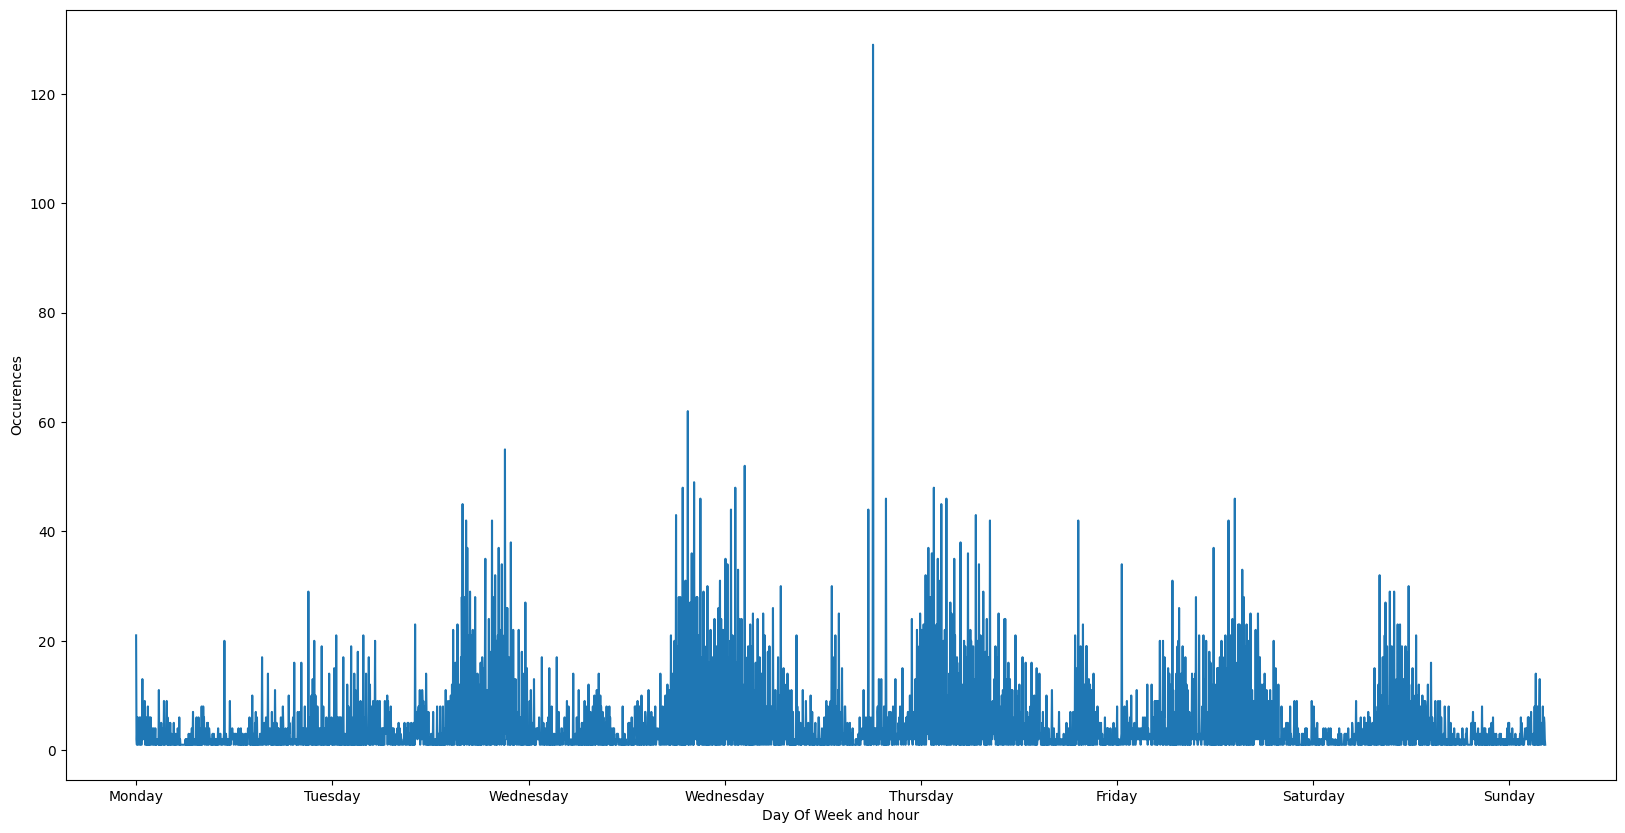

In [12]:
prositutions = df[df.Category == "PROSTITUTION"]
num_incidents = prositutions.groupby([prositutions.Timestamp.dt.day_of_week, prositutions.Timestamp.dt.day_name(), prositutions.Timestamp.dt.hour, prositutions.Timestamp.dt.minute]).size()

max_label = num_incidents.idxmax()
max_value = num_incidents.max()

num_incidents.droplevel(0,'index').droplevel(1,'index').droplevel(1,'index').plot(kind="line", xlabel="Day Of Week and hour", ylabel="Occurences", figsize=(20,10))
plt.show()

> **Alignment bias in timestamps**
>
> This error could be due to subjects not knowing the exact time of when the crime happened and therefore reporting a time on the hour or multiples of 15 minutes. This introduces a bias when binning the incidents by what time they happened. This should be taken into account when eg. considering when to deploy police patrols. It might not be the best idea to only patrol exactly on the clock.

> __*Hall of justice* as an unlikeley hotspot for sex offences.__
>
> This might be due to the victims reporting the crime at the Hall of Justice and not actually the crime itself happened at the location. This might give a wrong indication of which particular areas to keep an eye on in order to bring down the number of sex offenses. The police might want to have two different columns instead, specifying where the crime happened and where it was reported to avoid confusion.

**Find your own example of human noise in the data and visualize it.**
> We start by visualizing a scatter map plot of where crimes take place.

In [13]:
XY = df.groupby([df["X"], df["Y"]]).size().reset_index()
XY.columns = ["X", "Y", "Count"]
df_XY = pd.DataFrame(XY)

In [14]:
fig = px.scatter_mapbox(df_XY, 
                        lat="Y", 
                        lon="X", 
                        color="Count", 
                        zoom=15, 
                        mapbox_style="carto-positron",
                        center = {"lat": 37.7841, "lon": -122.410},
                        size="Count",
                        size_max=15,
                        height=300)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

> From the scatter plot of the XY coordinates of the reported crimes, we see that they mostly fall on street corners and in the middle of the street. This indicates that the XY location of the crime might be generated from a street address and should not be taken to literally. This would eg. bias the result if analyzing how many crimes happen on the street relative to inside buildings, shops, etc. 